# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

ICMC-USP
----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna uma série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [3]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)
    
#read_particulas()
#print(read_particulas().shape)

#### 1.1) (0.5 ponto) 
Faça o gráfico do número de partículas utilizando como discretização no eixo $x$ pontos igualmente espaçados no intervalo $[0,2\pi]$.

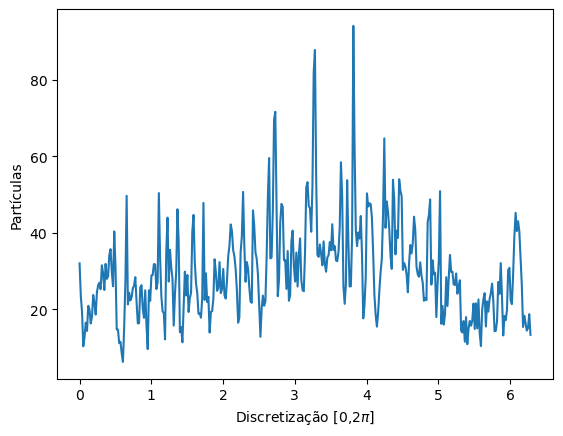

In [4]:
T = read_particulas()
x_values = np.linspace(0, 2*np.pi, num = T.shape[0]) # T.shape[0] realiza espaçamento igual entre todos os valores
plt.xlabel("Discretização [0,2$\pi$]")
plt.ylabel("Partículas")
plt.plot(x_values,T)
plt.show()

#max_index = np.argmax(T)
#print(T[max_index])

#### 1.2) (3 pontos)
Considere a função 

$$
f(t)=a_0+a_1\cos(t)+a_2\sin(t)+a_3\cos(2t)+a_4\sin(2t)
$$

como modelo para a distribuição das partículas dadas no exercício anterior. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo a minimizar $\sum_i\|f(t_i)-Q(t_i)\|$, onde $Q(t_i)$ é o número de partículas no ponto $t_i\in [0,2\pi]$. 

Qual o erro médio quadrático da aproximação gerada?

a) 300.1<br>
b) 200.9<br>
c) 110.6 (X)<br> 
d) 90.6

In [6]:
def _Trigonometry(a,x_values):
    func = a[0] + a[1]*(np.cos(x_values)) + a[2]*(np.sin(x_values)) + a[3]*(np.cos(2*x_values)) + a[4]*(np.sin(2*x_values))
    return func
    
def _Erro(a,x_values,T):
    erro = np.sum((_Trigonometry(a,x_values)-T)**2) / len(T)
    return erro
    
A = np.ones((x_values.shape[0],5))
A[:,1] = np.cos(x_values)
A[:,2] = np.sin(x_values)
A[:,3] = np.cos(2*x_values)
A[:,4] = np.sin(2*x_values)

AtA = np.dot(A.T,A)
coeficientes = np.linalg.solve(AtA,np.dot(A.T,T))
print("O erro médio quadrático é:", format(_Erro(coeficientes,x_values,T), ".1f"))

#print(A.shape)
#print(A)
#print(coeficientes)

O erro médio quadrático é: 110.6


#### 1.3) (1.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

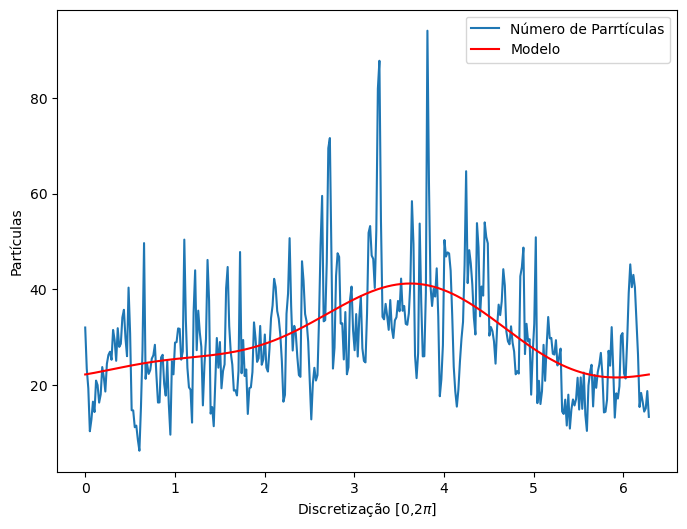

In [13]:
plt.figure(figsize=(8,6))
plt.plot(x_values, T)
plt.plot(x_values, _Trigonometry(coeficientes, x_values), c = 'red')
plt.xlabel("Discretização [0,2$\pi$]")
plt.ylabel("Partículas")
plt.legend(['Número de Parrtículas', 'Modelo'])
plt.show()

### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$. 

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

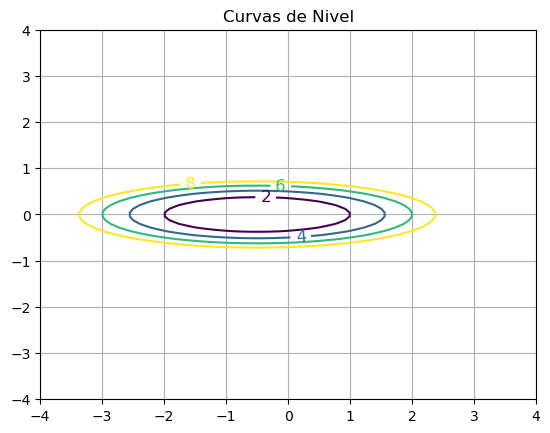

In [14]:
def _Func(x,y):
    function = (x**2)+16*(y**2)+(x)
    return function

x, y = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))
fig, ax = plt.subplots()
CS = ax.contour(x, y, _Func(x,y), levels = [2,4,6,8])
ax.clabel(CS, fontsize=12)
ax.set_title('Curvas de Nivel')
ax.grid(True)
plt.show()


#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53] (X)<br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

In [63]:
def jacobiana(xyl):
    x, y, l = xyl
    M = np.array([[2, -l, -y],
                  [-l, 32, -x],
                  [y, x, 0]])
    return M

def newton(_xyl):
    n = 100               # iterações
    N = np.zeros((3,n))   # N[0] = x, N[1] = y, N[2] = lambda
    N[:,0] = _xyl         # condição inicial
    H = np.zeros(3)
    for i in range(1,n):
        h1 = 2*N[0,i-1] + 1 - N[1,i-1]*N[2,i-1]  # h1 = 2x + 1 -yl 
        h2 = 32*N[1,i-1] - N[0,i-1]*N[2,i-1]     # h2 = 32y - xl 
        h3 = N[0,i-1]*N[1,i-1] - 1               # h3 = xy - 1
        H[:] = [h1, h2, h3]
        J = jacobiana(N[:,i-1])
        dxyl = np.linalg.solve(J,-H)
        N[:,i] = N[:,i-1]+dxyl
    
    return(N)

xyl = newton([2,1,1])     # chute inicial

if (np.all(np.abs(xyl[:,-1]-xyl[:,-2])<1e-7)):
    print('A solução é:', xyl[0:2,-1])
else:
    print('Solução Não convergiu!')
        

A solução é: [1.88579892 0.53027923]


#### 2.3) (1.5 ponto)
Faça o gráfico da curva $xy=1$ e da curva de nível de $f(x,y)$ que é tangente a ela calculada no exercício anterior, destacando o ponto de tangência. O valor da curva de nível é:

a) 7.38 <br>
b) 8.10 <br>
c) 9.94 (X)<br>
d) 10.51

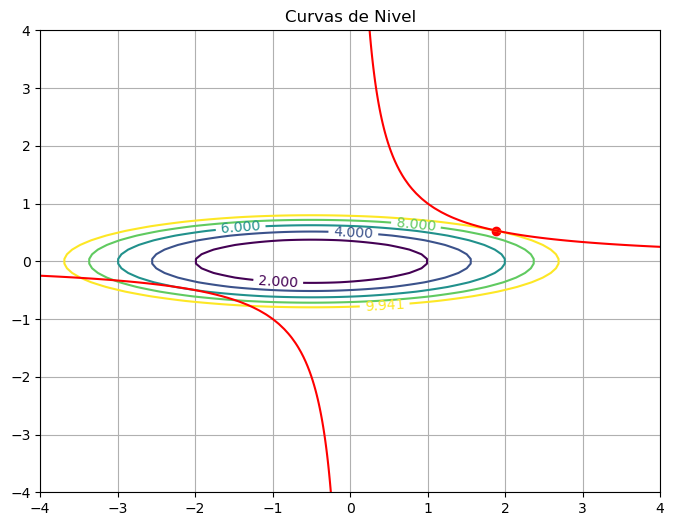

A curva de nível é (em amarelo): 9.94


In [26]:
x, y = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))

fig, ax = plt.subplots(figsize=(8,6))
CS1 = ax.contour(x, y, _Func(x,y), levels=[2,4,6,8,_Func(1.88579892, 0.53027923)])
CS2 = ax.contour(x, y, (x*y), colors='red', levels=[1])
ax.clabel(CS1, inline=2, fontsize=10)
ax.set_title('Curvas de Nivel')
ax.grid(True)

plt.scatter(1.88579892, 0.53027923, color='red')
plt.show()
print("A curva de nível é (em amarelo):", format(_Func(1.88579892, 0.53027923), ".2f"))